In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm
np.set_printoptions(suppress=True)

year = [i for i in range(2001,2018)] # 年份

In [2]:
# 输入数据文件名和表名
# 返回成分占比，特征向量，数据，列名
def Get_Data_of_PCA(sheet_file,sheet_name):
    # 获取数据
    df=pd.read_excel(sheet_file,sheet_name=sheet_name)
    data = df.values[:,1:]
    name = df.columns.values.tolist()[1:]
    # 数据主成分分析 
    pca = PCA()
    pca.fit(data)
    pca.transform(data)
    # 占比
    pca_pre = pca.explained_variance_ratio_
    # 特征向量
    pca_com = pca.components_

    # 展示内容
    print('每个成分各自方差百分比：',pca_pre)
    plt.title('Scree plot')
    plt.ylabel('Percent')
    plt.plot(pca_pre,'b-o')
    plt.show()
    
    return name,data,pca_pre,pca_com

In [3]:
# 输入数据和降维维度
# 返回降维数据
def Get_Dim_Data(data,num):
    # 降维数据
    pca = PCA(num)
    pca.fit(data)
    dim_low = pca.transform(data)
    for i in range(len(dim_low[0])):
        plt.plot(year,dim_low[:,i],'g-1')
    plt.show()
    return dim_low

In [4]:
# 输入x，y值以及方程最高次数
# 返回系数，模型信息以及拟合 Y 数值
def Get_Function(x,y,num,flag=0):
    # 数组一维化
    x = x.flatten()
    y = y.flatten()
    
    X = x
    for i in range(1,num):
        X = np.column_stack((X,x**(i+1)))
    X = sm.add_constant(X)
    
    model = sm.OLS(y,X)
    result = model.fit()
    y_val = result.fittedvalues
    
    import warnings
    warnings.filterwarnings("ignore")
    print(result.summary())
    
    # 绘图
    line, = plt.plot(x, y, 'b''o')
    line_val, = plt.plot(x, y_val, 'r-1')
    
    plt.legend([line, line_val], ['ture data', 'fitting data'])
    plt.title('Data plot')
    plt.xlabel('economic')
    plt.ylabel('pollution')
    plt.show()
    
    return result.params,result.summary(),y_val

每个成分各自方差百分比： [0.99189355 0.00697562 0.00086643 0.00025537 0.0000089  0.00000013
 0.        ]


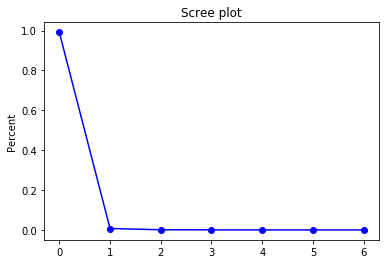

经济影响因素： ['人均GDP（元）', '农业总产值（万元）', '固定资产投资额（万元）', '社会消费品零售额（万元）', '工业总产值（万元）', '财政收入（万元）', '财政支出（万元）']


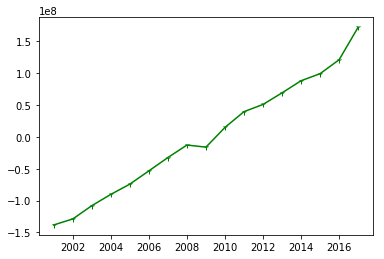

成分降维数据： [-138237766.90129527, -128862236.75893508, -108000431.74302219, -90276590.65629938, -74200562.85635796, -53401546.7547991, -32453696.82650668, -12878191.837340323, -16166757.969391804, 14800489.795069538, 39559299.870759286, 50841833.75815643, 69048504.77034931, 88065978.69668727, 99145631.30725043, 121013051.839107, 172002992.26656833]


In [5]:
# 经济数据列名，数据，各成分占比，特征向量
eco_name,eco_data,eco_pre,eco_com = Get_Data_of_PCA('深圳市数据.xls','economic_factor')
print('经济影响因素：',eco_name)

# 经济数据降维结果
eco_dim = Get_Dim_Data(eco_data,1)
# 展示降维数据
print('成分降维数据：',eco_dim.flatten().tolist())

每个成分各自方差百分比： [0.99970807 0.00026174 0.00002398 0.00000364 0.00000257]


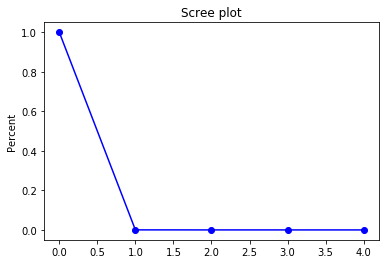

污染影响因素： ['二氧化硫日均量(ug/m3)', '二氧化氮日均量(ug/m3)', '可吸入颗粒物日均量(ug/m3)', '工业固体废物产生量（万吨）', '工业烟粉尘排放量（吨）']


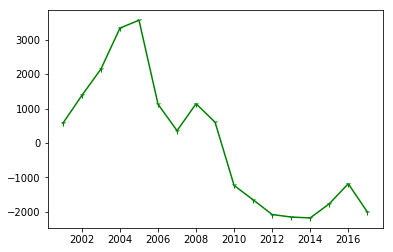

成分降维数据： [574.0738568570587, 1383.9577509631042, 2148.752916394255, 3337.4344802581018, 3564.2174308180274, 1124.8988579029508, 357.6027467791704, 1140.457816291799, 602.4145136651339, -1233.8895338697437, -1649.403457683107, -2076.01418094308, -2150.6156536374688, -2175.1507633806, -1765.5482460054816, -1183.5457791275244, -1999.642755282594]


In [6]:
# 污染数据列名，数据，各成分占比，特征向量
pol_name,pol_data,pol_pre,pol_com = Get_Data_of_PCA('深圳市数据.xls','pollution_factor')
print('污染影响因素：',pol_name)
# 污染数据降维结果
pol_dim = Get_Dim_Data(pol_data,1)
# 展示降维数据
print('成分降维数据：',pol_dim.flatten().tolist())

In [7]:
# 综合得分表
eco_score = eco_dim.flatten()
pol_score = pol_dim.flatten()

# 离差标准化主成分得分
eco_score = ((eco_dim - np.min(eco_dim))/(np.max(eco_dim)- np.min(eco_dim)))
pol_score = ((pol_dim - np.min(pol_dim))/(np.max(pol_dim)- np.min(pol_dim)))

total_score = pd.DataFrame(np.hstack((eco_score,pol_score)),columns=['economic score','pollution score'])
print('综合得分表：')
print(total_score)

综合得分表：
    economic score  pollution score
0         0.000000         0.479012
1         0.030220         0.620122
2         0.097464         0.753376
3         0.154593         0.960486
4         0.206411         1.000000
5         0.273453         0.574985
6         0.340974         0.441295
7         0.404072         0.577696
8         0.393472         0.483950
9         0.493289         0.164001
10        0.573094         0.091604
11        0.609461         0.017273
12        0.668146         0.004275
13        0.729446         0.000000
14        0.765159         0.071367
15        0.835644         0.172772
16        1.000000         0.030580


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     14.24
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           0.000422
Time:                        11:32:56   Log-Likelihood:                 4.2714
No. Observations:                  17   AIC:                            -2.543
Df Residuals:                      14   BIC:                          -0.04309
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8125      0.124      6.577      0.0

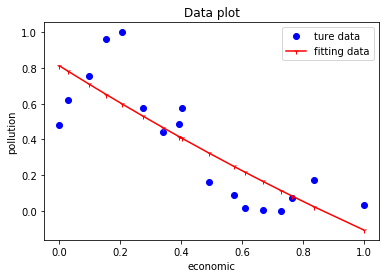

In [8]:
coe,fun,y_val = Get_Function(eco_score,pol_score,2,1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     21.47
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.58e-05
Time:                        11:33:17   Log-Likelihood:                 10.003
No. Observations:                  17   AIC:                            -12.01
Df Residuals:                      13   BIC:                            -8.673
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6058      0.109      5.579      0.0

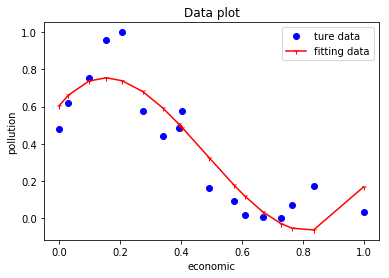

In [9]:
coe,fun,y_val = Get_Function(eco_score,pol_score,3,1)